<a href="https://colab.research.google.com/github/RakaAdithya/Data-Analyst-Project/blob/main/EDA_for_Two_Centuries_Ultra_Marathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import pandas as pd
import seaborn as sns

df=pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

<ipython-input-6-8acccec785dd>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [7]:
#first thing that we ussualy do is to find out what kind of table we working
df.info() #bassicly giving us overall view of table we working on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6325495 entries, 0 to 6325494
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 float64
dtypes: float64(2), int64(2), object(9)
memory usage: 627.4+ MB


In [8]:
#lets see how much row we have on this dataset
df.shape

(6325495, 13)

In [9]:
#looks toomuch for my computer to handle. let slim it dow to several categories :
#event placed in USA, with range in 50km or 50mi and held in 2020
df2 = df.copy()

df2=df2[(df['Event distance/length'].isin(['50km','50mi'])) &
  (df['Year of event'] == 2020) &
    (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)=='USA')]


In [10]:
df2.shape

(26090, 13)

In [11]:
#let's do some data cleaning
#we want the country code on the Event name to be in seperated column called 'Event Country' & remove 'h' on athlete perfomance

df2['Event country']=df['Event name'].str.extract(r'\((.*?)\)')
df2['Athlete performance']=df['Athlete performance'].str[:-2]



In [12]:
df2.shape

(26090, 14)

In [13]:
df2.head(3
        )

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event country
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287.0,USA
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508.0,USA
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838.0,USA


In [14]:
#next step let's created another columns for athelete age when they participated on the event

df2['Athlete_age']=2020-df2['Athlete year of birth']

In [15]:
#lets drop some column to tidy up table:
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)


In [16]:
#lets eliminate null data
df2=df2.dropna()

In [17]:
#eliminate duplicates
df2=df2.drop_duplicates()

In [18]:
df2.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Event country,Athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55,M,15.158,71287.0,USA,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32,M,12.369,629508.0,USA,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57,M,12.099,64838.0,USA,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02,M,11.449,704450.0,USA,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34,M,11.212,810281.0,USA,43.0
...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48,F,7.013,816361.0,USA,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22,F,6.706,326469.0,USA,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24,F,6.705,372174.0,USA,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30,F,6.543,860349.0,USA,39.0


In [19]:
#lets fix some data try
df2['Athlete average speed']=df2['Athlete average speed'].astype(float)

<Axes: xlabel='Event distance/length', ylabel='Count'>

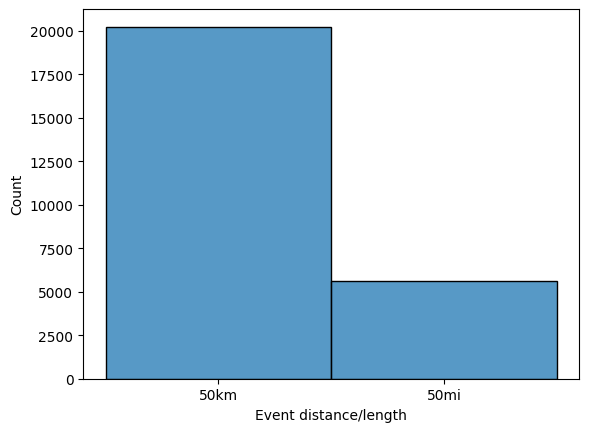

In [20]:
#question I want to answer : how big is the difference betwen 50km and 50mi participant

sns.histplot(df2['Event distance/length'])

Text(0, 0.5, 'Count')

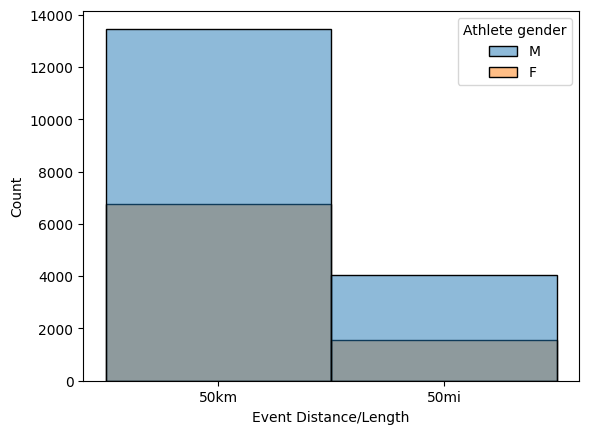

In [21]:
#might as well show how much male and female athele that patricipate on that graph

import matplotlib.pyplot as plt
sns.histplot(df2,x= 'Event distance/length', hue ='Athlete gender')

plt.xlabel('Event Distance/Length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

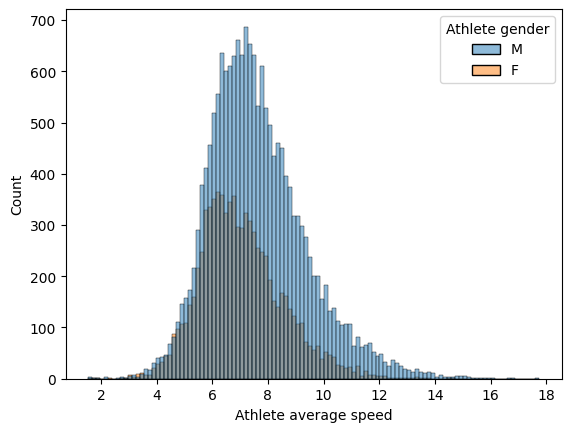

In [22]:
#average speed for athlete
import matplotlib.pyplot as plt
sns.histplot(df2,x= 'Athlete average speed', hue ='Athlete gender')

plt.xlabel('Athlete average speed')

plt.ylabel('Count')

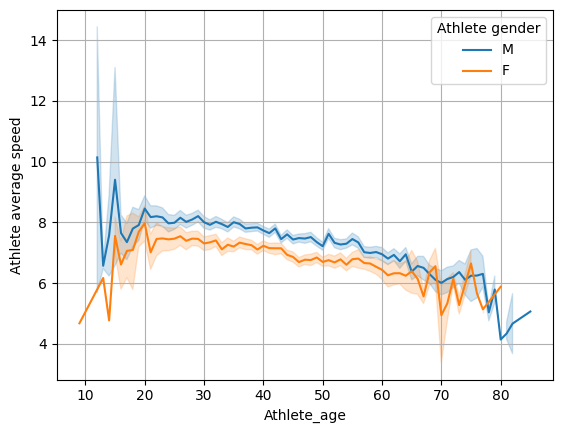

In [23]:
#average speed
import matplotlib.pyplot as plt

sns.lineplot(data=df2, x ='Athlete_age', y='Athlete average speed', hue ='Athlete gender')
plt.grid()

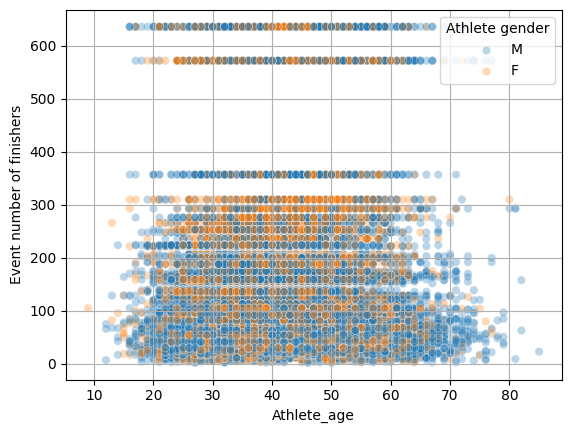

In [24]:
#distribution for finished participant and their age
import matplotlib.pyplot as plt

sns.scatterplot(data=df2, x ='Athlete_age', y='Event number of finishers', hue ='Athlete gender', alpha = 0.3)
plt.grid()